In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib import rc
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt


#맥에서 한글 안깨지게
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv("../data/train/train.csv") # 각자 경로에 맞게 수정
df_holidays = pd.read_csv("../data/holidays_2023_2025.csv") # 각자 경로에 맞게 수정

# 연, 월, 일 col 생성
df['영업일자'] = pd.to_datetime(df['영업일자'])
df['연'] = df['영업일자'].dt.year
df['월'] = df['영업일자'].dt.month
df['일'] = df['영업일자'].dt.day
# 영업장, 메뉴명 col 생성
df[['영업장', '메뉴명']] = df['영업장명_메뉴명'].str.split('_', expand=True)
# 요일 col 생성
df['요일'] = df['영업일자'].dt.dayofweek.map({
    0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'
})
# 공휴일 col 생성
df_holidays["locdate"] = pd.to_datetime(df_holidays["locdate"])
holiday_dates = set(df_holidays['locdate'])
df['is_holiday'] = df['영업일자'].isin(holiday_dates).astype(int)



FileNotFoundError: [Errno 2] No such file or directory: '../data/train/train.csv'

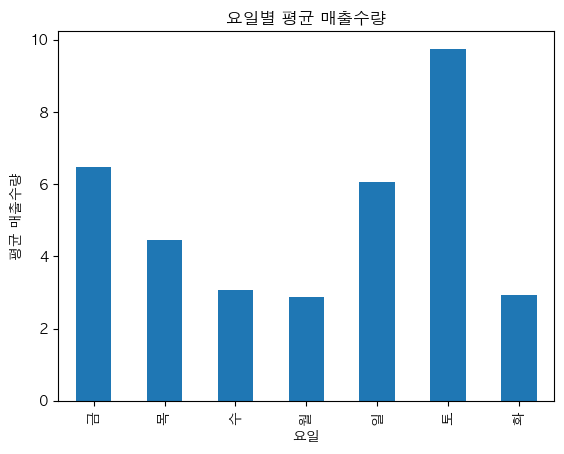

In [ ]:
df_hall = df.loc[df['영업장명_메뉴명'] == '미라시아_잭 애플 토닉'] # 영업장명_메뉴명 바꿔주면서 확인

# 요일별 평균 (매출 있는 날만)
df_hall.groupby('요일')['매출수량'].mean().plot(
    kind='bar', title='요일별 평균 매출수량'
)
plt.ylabel("평균 매출수량")
plt.show()

is_holiday
평일    5.113546
휴일    4.666667
Name: 매출수량, dtype: float64


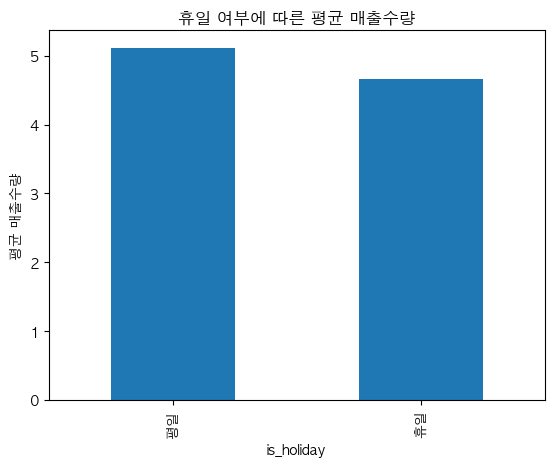

In [ ]:
# 휴일 여부에 따른 평균 매출수량
holiday_mean = (
    df_hall.groupby('is_holiday')['매출수량']
    .mean()
    .rename({0: '평일', 1: '휴일'})
)
print(holiday_mean)

# 시각화
holiday_mean.plot(kind='bar', title='휴일 여부에 따른 평균 매출수량')
plt.ylabel("평균 매출수량")
plt.show()

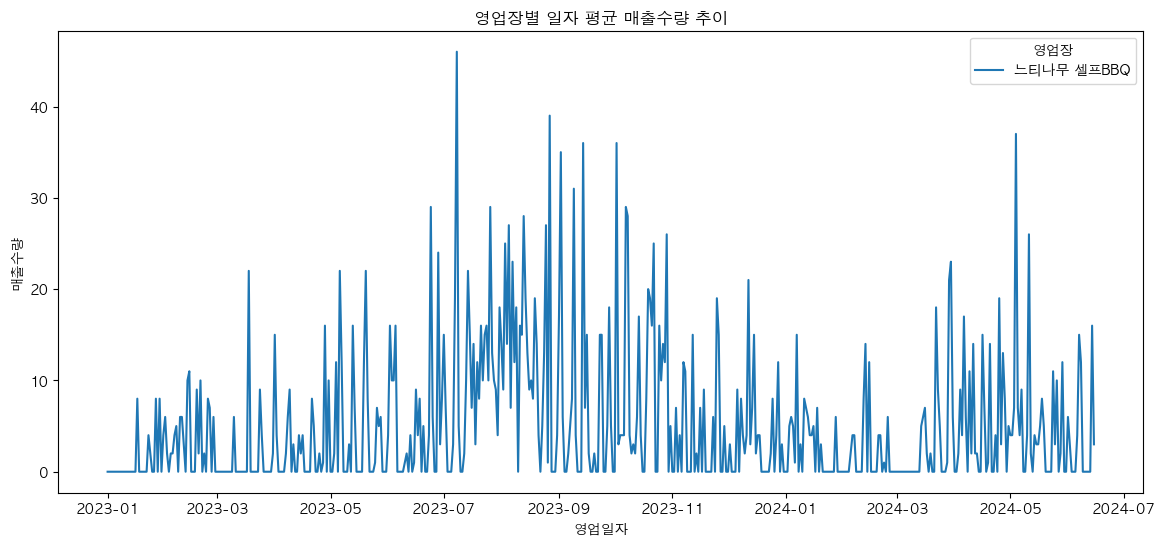

In [ ]:
daily_shop = df_hall.groupby(['영업일자', '영업장'])['매출수량'].mean().reset_index()

# 매출이 있는 날만 필터링

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_shop, x='영업일자', y='매출수량', hue='영업장')
plt.title('영업장별 일자 평균 매출수량 추이')
plt.show()